# 信号与系统大作业

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 题目中的 omega 和 phi 的取值
omega_values = [1, 3, 6]
phi_values = list(map(np.radians, [15, -30, 60]))

因为题目给的函数对应的 $F(j\omega)$ 只在某几个点处有取值，所以可以用 DFT 计算它。

先在一个周期 $[0, 2\pi)$ 里以 $1000$ 的采样率进行均匀采样，把函数 $f$ 离散化，再用 FFT 算法计算其 DFT。需要注意的是，由于采样率为 $1000$，所以实际上是在对 $f \left(\dfrac{k}{1000} \right)$ 做 DFT，算出来的结果需要除掉采样率做修正。

In [2]:
TOTAL_TIME = 2 * np.pi # 一个周期
SAMPLE_RATE = 1000     # 采样率

# 对函数进行傅里叶变换
def compute_fourier_transform(f):
    t = np.linspace(0, TOTAL_TIME, int(SAMPLE_RATE * TOTAL_TIME),
                    endpoint=False)
    samples = f(t)

    freq = np.fft.fftfreq(len(samples), 1 / SAMPLE_RATE)
    freq *= 2 * np.pi # 转换为角频率

    dft = np.fft.fft(samples) / SAMPLE_RATE
    nonzero = np.where(np.abs(dft) > 1e-10)
    return freq[nonzero], dft[nonzero]

下面写了一个 `plot_signals` 函数，用于同时绘制多个信号的频谱。

In [3]:
class SignalInfo:
    def __init__(self, title, f):
        self.title = title
        self.f = f # 关于时间的函数

# 绘制频谱图
def plot_signals(signals: list[SignalInfo]):
    plt.figure(figsize=(4 * len(signals), 4 * 2))

    for i, sig in enumerate(signals):
        freq, values = compute_fourier_transform(sig.f)
        magnitude = np.abs(values)
        phase = np.angle(values, deg=True)

        # 绘制幅度
        plt.subplot(2, len(signals), i + 1)
        plt.stem(freq, magnitude)
        plt.title(sig.title)
        plt.ylabel(r'Magnitude')
        plt.grid(True)

        for x, y in zip(freq, magnitude):
            plt.annotate(f'{y:.2f}', xy=(x, y),
                        ha='center', va='bottom', color='red')

        # 绘制相位
        plt.subplot(2, len(signals), i + 1 + len(signals))
        plt.stem(freq, phase)
        plt.xlabel(r'Angular Frequency (rad/s)')
        plt.ylabel(r'Phase (deg)')
        plt.grid(True)

        for x, y in zip(freq, phase):
            plt.annotate(f'{y:.2f}', xy=(x, y),
                        ha='center', va='bottom', color='red')

    plt.tight_layout()
    plt.show()

## 第一问

画出

$$
\cos(\omega_0 t + \phi)
$$

的频谱，其中 $\omega_0$ 的数值分别为 $1,3,6$；$\phi$ 的数值分别为 $15^\circ, -30^\circ, 60^\circ$。

$$
\cos(\omega_0 t + \phi) \longleftrightarrow \pi \left[ \delta(\omega+\omega_0) e^{-j\phi} + \delta(\omega-\omega_0) e^{j\phi} \right]
$$

下面的图和计算结果是吻合的。

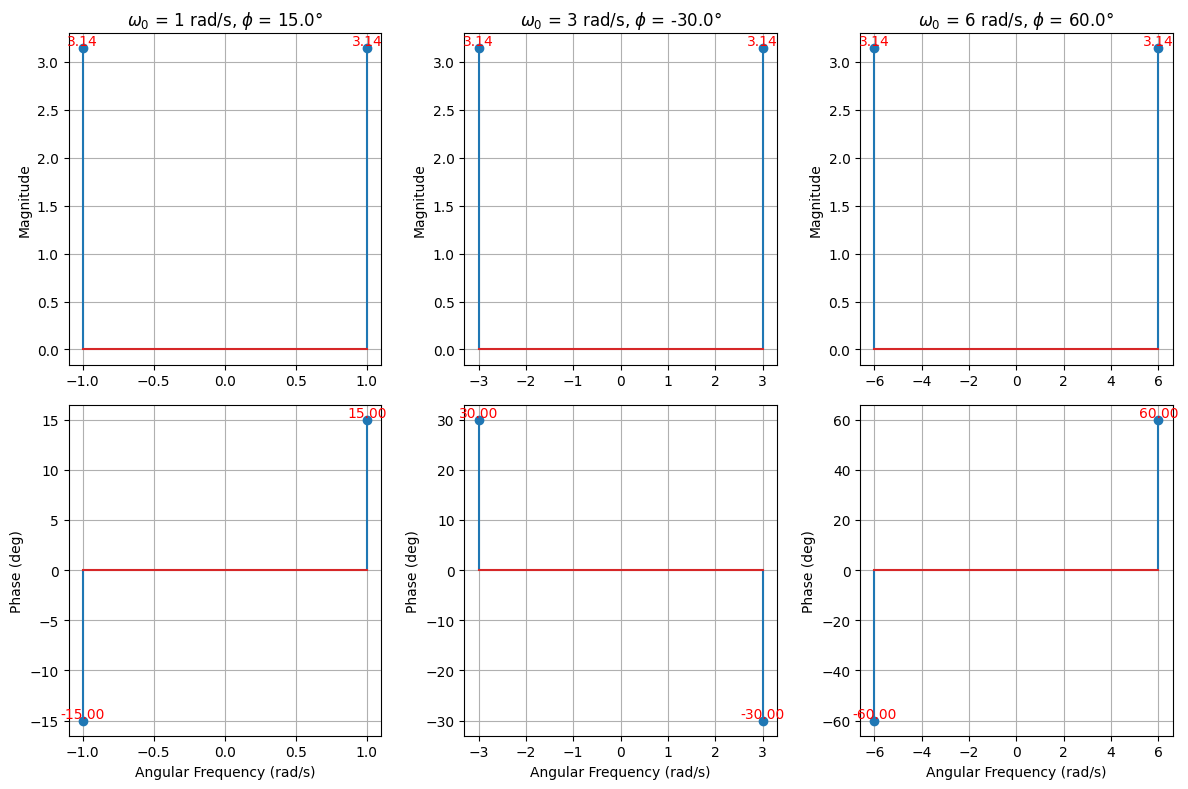

In [4]:
plot_signals([
    SignalInfo(
        title=rf'$\omega_0$ = {omega} rad/s, '
            rf'$\phi$ = {np.round(np.degrees(phi))}°',
        f=lambda t, omega=omega, phi=phi: np.cos(omega * t + phi)
    )
    for omega, phi in zip(omega_values, phi_values)
])

## 第二问

画出

$$
e^{j(\omega_0 t + \phi)}
$$

的频谱，其中 $\omega_0$ 的数值分别为 $1,3,6$；$\phi$ 的数值分别为 $15^\circ, -30^\circ, 60^\circ$。

$$
e^{j(\omega_0 t + \phi)} \longleftrightarrow 2\pi \delta(\omega-\omega_0) e^{j\phi}
$$

下面的图和计算结果是吻合的。

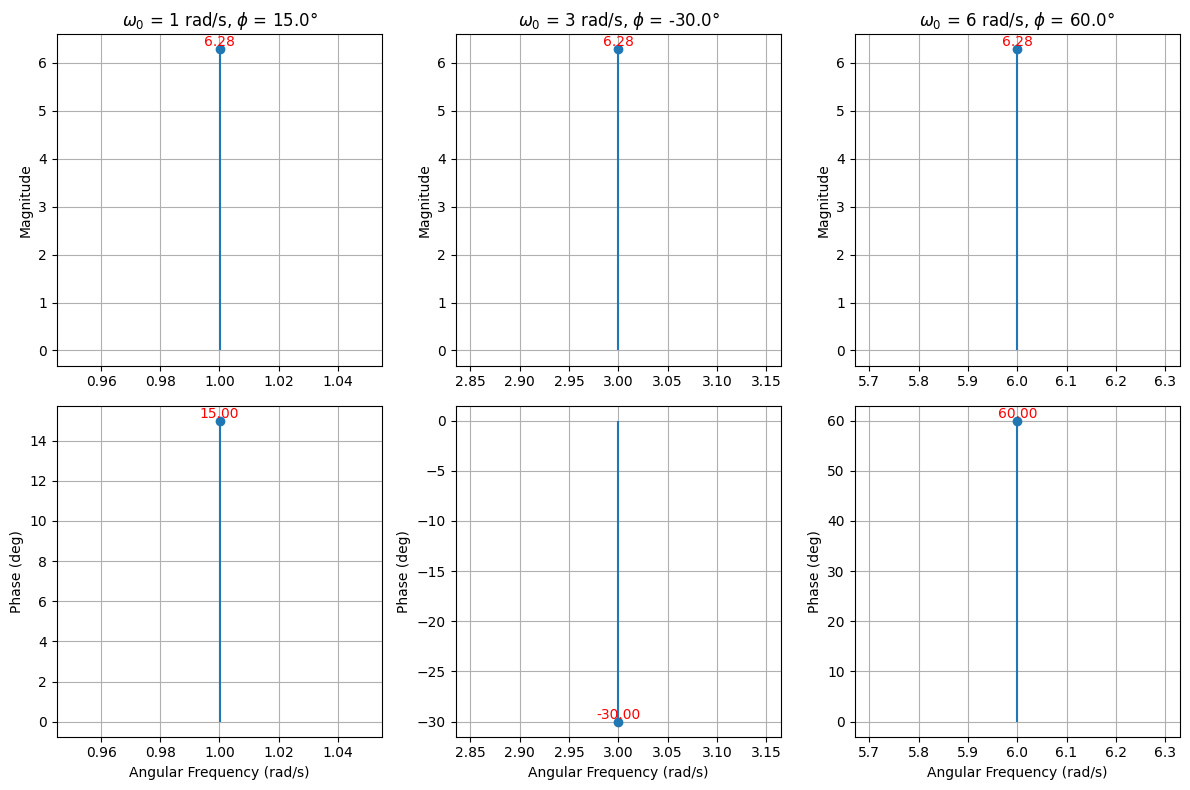

In [5]:
plot_signals([
    SignalInfo(
        title=rf'$\omega_0$ = {omega} rad/s, '
            rf'$\phi$ = {np.round(np.degrees(phi))}°',
        f=lambda t, omega=omega, phi=phi: np.exp(1j * (omega * t + phi))
    )
    for omega, phi in zip(omega_values, phi_values)
])

## 第三问

将第二问中的 3 个复信号两两组合，写出获得的 3 个信号的表达式，分别画出其实部信号的频谱。

$$
\begin{align}
f_1(t) &= e^{j(t + 15^\circ)} + e^{j(3t - 30^\circ)} \\
f_2(t) &= e^{j(t + 15^\circ)} + e^{j(6t + 60^\circ)} \\
f_3(t) &= e^{j(3t - 30^\circ)} + e^{j(6t + 60^\circ)}
\end{align}
$$



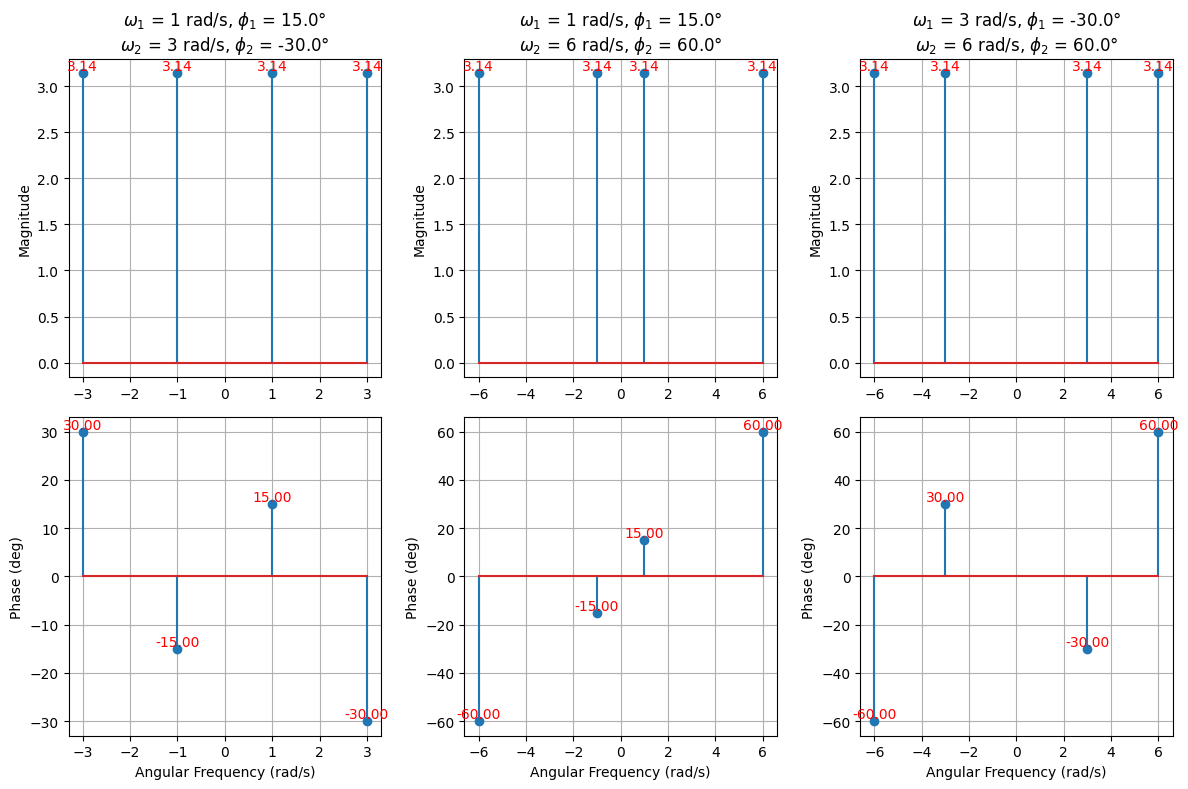

In [6]:
from itertools import combinations

plot_signals([
    SignalInfo(
        title=f'$\\omega_1$ = {omega1} rad/s, '
            f'$\\phi_1$ = {np.round(np.degrees(phi1))}°\n'
            f'$\\omega_2$ = {omega2} rad/s, '
            f'$\\phi_2$ = {np.round(np.degrees(phi2))}°',
        f=lambda t, omega1=omega1, phi1=phi1, omega2=omega2, phi2=phi2:
            np.real(np.exp(1j * (omega1 * t + phi1)) + \
                np.exp(1j * (omega2 * t + phi2)))
    )
    for ((omega1, phi1), (omega2, phi2)) in combinations(
        zip(omega_values, phi_values), 2)
])

## 结论

实信号的幅值频谱是偶函数，相位频谱是奇函数。复信号的频谱没有这样的特点。